<a href="https://colab.research.google.com/github/ishika-mittal/Stock-Prices-Analytics-Dashboard/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I6: Moving average convergence divergence (MACD)**

1. Its a trend-following momentum indicator and is calculated by subtracting the 26-period EMA from the 12-period EMA, called the MACD line.

2. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line.

3. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line.

Details: https://www.investopedia.com/terms/m/macd.asp 



In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing yfinance library for fetching historical stock data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 6.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=6ad6a3c55205156a9dd8b431cba061cbb838821b66bec6dff43383761369837d
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Function to get the stock data
def stock_data(stock, start_date, end_date):

    tickerSymbol = stock

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

    return tickerDf

In [4]:
#Fetching a 1Y dataset for better representation

df = stock_data("ITC.BO", "2020-06-08", "2021-06-08")
df.reset_index(level="Date", inplace=True)
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

print(df.shape)
df.head()

(250, 6)


,Date,Open,High,Low,Close,Volume
0,2020-06-08,182.945035,184.074883,178.199672,178.742004,744734
1,2020-06-09,179.826649,186.289389,178.696801,179.510300,1341970
2,2020-06-10,180.052627,183.668142,179.284339,180.097824,1024793
3,2020-06-11,180.775730,181.905578,174.990912,175.894791,855456
4,2020-06-12,171.375387,176.482296,169.974373,175.352448,980250


In [5]:
#Creating a dataset with only Closing Price column and Date as index

data = df.sort_index(ascending=True,axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df1["Date"][i]=data['Date'][i]
    df1["Close"][i]=data["Close"][i]

df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)
print(df1.shape)
df1.head()

(250, 1)


,Close
Date,
2020-06-08,178.742
2020-06-09,179.51
2020-06-10,180.098
2020-06-11,175.895
2020-06-12,175.352


In [6]:
#Defining Function

def MACD(data, slow, fast, smooth):

    exp1 = data['Close'].ewm(span = fast, adjust = False).mean()
    exp2 = data['Close'].ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1-exp2)

    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean())

    data['MACD'] = macd.values
    data['Signal'] = signal.values

    return data

In [7]:
#Implementing the Function

MACD(df1, 26, 12, 9)
df1.tail()

,Close,MACD,Signal
Date,,,
2021-06-01,209.374,1.770135,0.817326
2021-06-02,203.342,1.447876,0.943436
2021-06-03,203.439,1.186655,0.992080
2021-06-04,203.147,0.945187,0.982701
2021-06-07,205.726,0.950905,0.976342


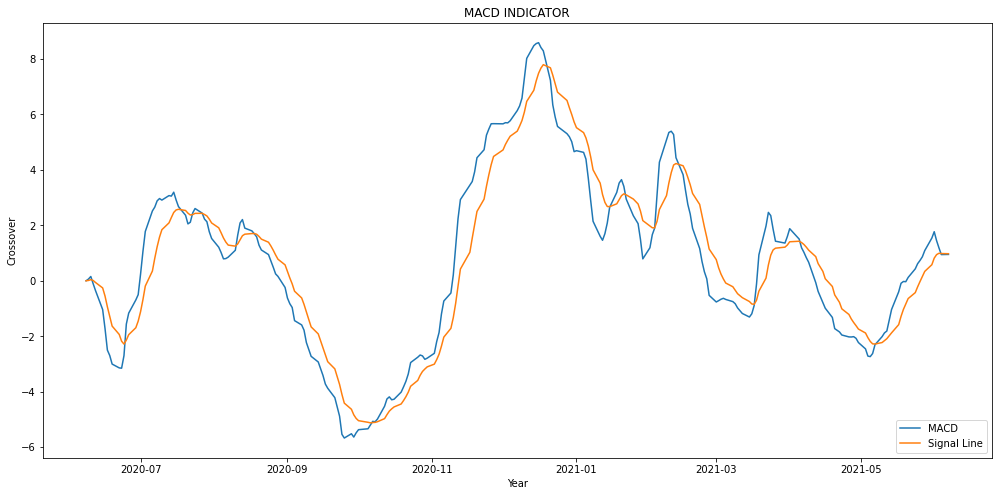

In [8]:
#Plotting 

#Setting labels
plt.figure(figsize=(17,8))
plt.xlabel("Year")

plt.ylabel("Crossover")
plt.title("MACD INDICATOR")

#Let's go
plt.plot(df1[['MACD', 'Signal']])
plt.legend(["MACD","Signal Line"], loc ="lower right")
plt.show()